# Dimensionality Reduction Assignments

## 1. Applying PCA

In [1]:
# 1. Read in the student grades data set
import pandas as pd

df = pd.read_csv('../Data/student_grades.csv')
df.head()

,student_id,math,science,cs,band,english,history,spanish,physed
0,1,46,48,50,74,34,44,39,73
1,2,66,65,65,66,74,80,75,63
2,3,55,53,50,76,71,72,76,71
3,4,53,57,53,80,77,77,85,82
4,5,55,62,58,67,82,77,78,60


In [2]:
# 2. Drop the first column with student_id
grades = df.iloc[:,1:]
grades.head()

,math,science,cs,band,english,history,spanish,physed
0,46,48,50,74,34,44,39,73
1,66,65,65,66,74,80,75,63
2,55,53,50,76,71,72,76,71
3,53,57,53,80,77,77,85,82
4,55,62,58,67,82,77,78,60


In [3]:
# 3. Center the data
grades_centered = grades - grades.mean()
grades_centered.head()

,math,science,cs,band,english,history,spanish,physed
0,-7.05,-5.22,-2.75,3.96,-26.97,-19.6,-26.56,5.39
1,12.95,11.78,12.25,-4.04,13.03,16.4,9.44,-4.61
2,1.95,-0.22,-2.75,5.96,10.03,8.4,10.44,3.39
3,-0.05,3.78,0.25,9.96,16.03,13.4,19.44,14.39
4,1.95,8.78,5.25,-3.04,21.03,13.4,12.44,-7.61


In [4]:
# 4. Fit a PCA model with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(grades_centered)

PCA(n_components=2)

In [15]:
# 5. View and interpret the explained variance ratios
pca.explained_variance_ratio_ 

array([0.81844937, 0.09778153])

In [16]:
# first component explains 81% of the variance in the data, second comp captures around 10% of that variance.
# First + Second = Over 90% of the variance in our data

## 2. Interpreting PCA 

In [19]:
# 1. View and interpret the components of the PCA model
pca.components_

array([[ 0.34433892,  0.34662586,  0.32733313, -0.00417335,  0.45552196,
         0.46095972,  0.48354746,  0.01773586],
       [ 0.45069884,  0.44923506,  0.47433583,  0.096715  , -0.33260806,
        -0.31949261, -0.35110809,  0.15725648]])

In [20]:
grades.columns

Index(['math', 'science', 'cs', 'band', 'english', 'history', 'spanish',
       'physed'],
      dtype='object')

In [21]:
# PC1: higher = better grades
# PC2: higher = better stem grades, lower = better humanities grades

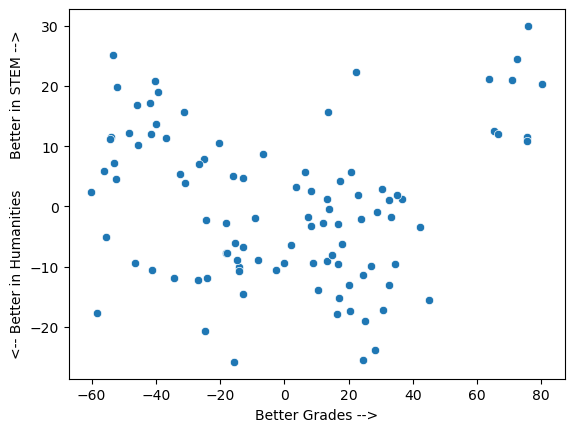

In [23]:
# 2. Plot the students on a scatter plot with the x-axis as PC 1 and the y-axis as PC 2
# view the data on a scatter plot
grades_transformed = pd.DataFrame(pca.transform(grades_centered), columns=['PC1', 'PC2'])
grades_transformed.head()

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=grades_transformed)
plt.xlabel('Better Grades -->')
plt.ylabel('<-- Better in Humanities       Better in STEM -->');

In [24]:
# 3. Interpret the clusters of students that you see and make recommendations for the guidance counselor

**Recommendations:**
* The students at the top right have high grades and are good in STEM - **recommend top technical universities for them**
* The students at the top left are strong in STEM, but could use better grades overall - **encourage them to pursue STEM majors**
* The students at the bottom left are strong in humanities, but could use better grades overall - **encourage them to pursue humanities majors**
* For the remaining students in the middle - **work with them to help them figure out what type of careers they are interested in**

## 3. T-SNE

In [25]:
# 1. Fit a t-SNE model with 2 components
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components=2, random_state=42)

In [29]:
data_tsne = tsne.fit_transform(grades)
#data_tsne

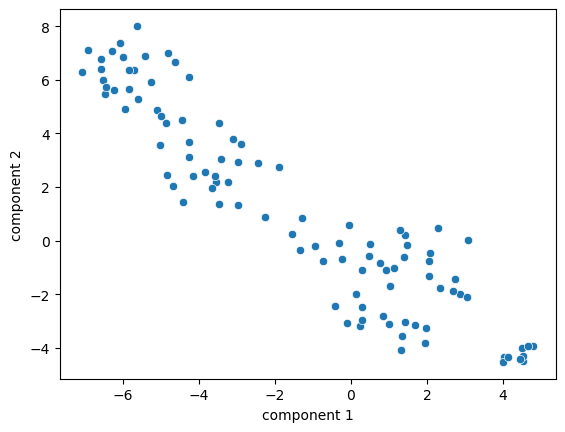

In [30]:
# 2. Plot the students on a scatter plot with the x-axis as component 1 and the y-axis as component 2
# plot the data
df_tsne = pd.DataFrame(data_tsne, columns=['component 1', 'component 2'])

sns.scatterplot(x='component 1', y='component 2', data=df_tsne);

In [11]:
# 3. Interpret the data you see on the plot
# Cluster visible at component 1 at 4.

## 4. T-SNE with Colors

In [12]:
# 1. Fit a KMeans model with 3 clusters


In [13]:
# 2. Overlay the 3 clusters onto a T-SNE plot


In [14]:
# 3. Interpret the cluster centers
